6 6 6


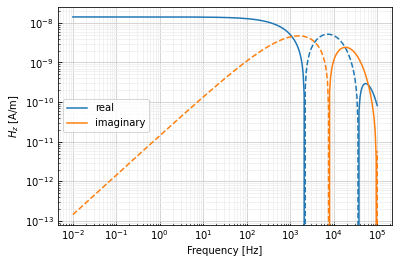

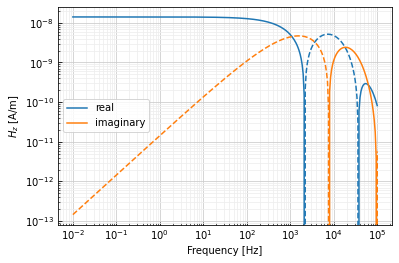

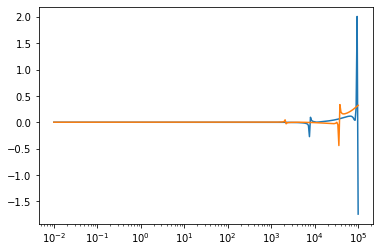

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import emulatte.forward as fwd
from emulatte.scripts_forward import modelw, transceiver, w1dem

#emulatte
thicks = np.array([20, 5, 2, 5])
res = np.array([100+100j, 80+80j, 10+10j, 80+80j, 100+100j])
tc = np.array([0, 0, 100])
rc = np.array([100, 0, 200])
freqtime = np.logspace(-2, 5, 301)

model = fwd.model(thicks)
vmd = fwd.transceiver('VMD', freqtime, dipole_moment=1)
model.add_resistivity(res)
model.locate(vmd, tc, rc)
print(model.num_layer, model.tmt_layer, model.rcv_layer)
ans, _ = model.emulate(hankel_filter='key201')

#w1dem0.0
fdtd = 1
tx = [0]
ty = [0]
tz = [100]
rx = [100]
ry = [0]
rz = [200]

dipole_mom = 1
thickness = [20, 5, 2, 5]
res = np.array([100+100j, 80+80j, 10+10j, 80+80j, 100+100j])
freqtime = np.logspace(-2, 5, 301)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.vmd(dipole_mom=dipole_mom)

resp = ans['h_z'].real
imsp = ans['h_z'].imag
plt.plot(freqtime, resp, "C0-", label='real')
plt.plot(freqtime, -resp, "C0--")
plt.plot(freqtime, imsp, "C1-", label='imaginary')
plt.plot(freqtime, -imsp, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respb = bns['h_z'].real
imspb = bns['h_z'].imag
plt.plot(freqtime, respb, "C0-", label='real')
plt.plot(freqtime, -respb, "C0--")
plt.plot(freqtime, imspb, "C1-", label='imaginary')
plt.plot(freqtime, -imspb, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respe = abs(resp-respb)/respb * 100
imspe = abs(imsp-imspb)/imspb * 100
plt.plot(freqtime, imspe)
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [18]:
%%time
#emulatte
thicks = np.array([20, 5, 2, 5])
res = np.array([100, 80, 10, 80, 100])
tc = np.array([0, 0, 100])
rc = np.array([100, 0, 200])
freqtime = np.logspace(-2, 5, 301)

model = fwd.model(thicks)
vmd = fwd.transceiver('VMD', freqtime, dipole_moment=1)
model.add_resistivity(res)
model.locate(vmd, tc, rc)
print(model.num_layer, model.tmt_layer, model.rcv_layer)
ans, _ = model.emulate(hankel_filter='key201')

6 6 6
CPU times: user 143 ms, sys: 4.28 ms, total: 147 ms
Wall time: 145 ms


In [15]:
%%time
#w1dem0.0
fdtd = 1
tx = [0]
ty = [0]
tz = [100]
rx = [100]
ry = [0]
rz = [200]

dipole_mom = 1
thickness = [20, 5, 2, 5]
res = np.array([100, 80, 10, 80, 100])
freqtime = np.logspace(-2, 5, 301)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1

w1dem_fdem = w1dem.Fdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)

bns, _ = w1dem_fdem.vmd(dipole_mom=dipole_mom)

CPU times: user 140 ms, sys: 2.64 ms, total: 142 ms
Wall time: 140 ms


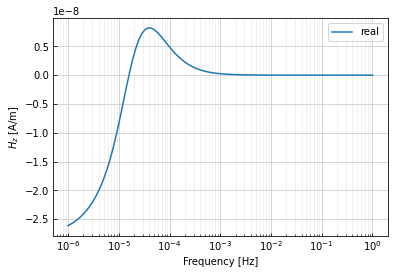

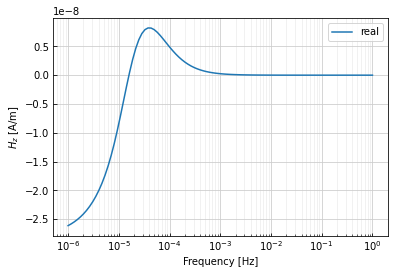

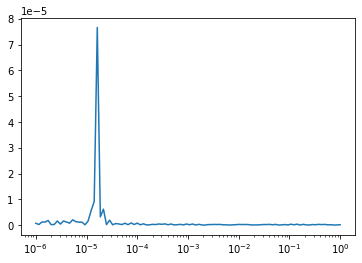

In [7]:
# VMD TD FFT
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
import emulatte.forward as fwd
from emulatte.scripts_forward import modelw, transceiver, w1dem

# emulatte
thicks = np.array([])
res = np.array([100])
sc = np.array([0, 0, 0])
rc = np.array([100, 100, 0])
freqtime = np.logspace(-6, 0, 100)

mdl = fwd.model(thicks)
mdl.add_resistivity(res)
vmd = fwd.transceiver('VMD', freqtime, dipole_moment=1)
mdl.locate(vmd, sc, rc)
ans, _ = mdl.emulate(hankel_filter='key201', time_diff=False, td_transform='FFT')

resp = ans['h_z'].real
imsp = ans['h_z'].imag
freqtime = np.logspace(-6, 0, 100)
plt.plot(freqtime, resp, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

#w1dem
fdtd = 2
tx = [0]
ty = [0]
tz = [0]
rx = [100]
ry = [100]
rz = [0]

dipole_mom = 1
thickness = []
res = np.array([100])
freqtime = np.logspace(-6, 0, 100)
plot_number = len(freqtime)
hankel_filter = "key201"
dbdt = 1

w1dem_tdem = w1dem.Tdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, 'h_z', freqtime)
bns, _ = w1dem_tdem.vmd(dipole_mom)
respb = bns['h_z'].real
plt.plot(freqtime, respb, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respe = abs(resp-respb)/abs(respb)
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

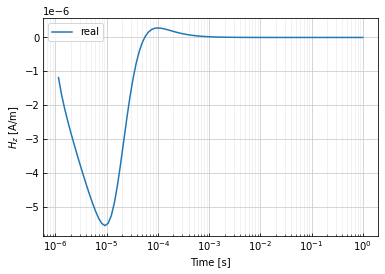

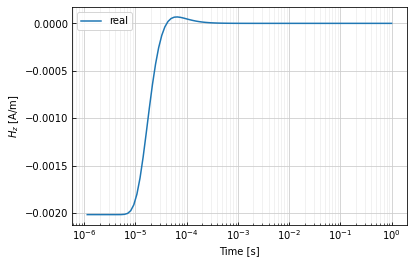

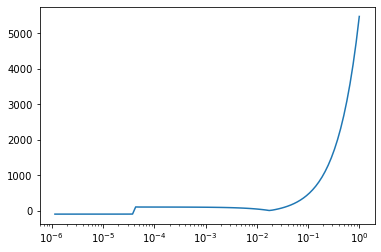

In [1]:
# VMD TD Euler
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from emulatte.forward import model, transceiver, w1dem

# emulatte
thicks = np.array([])
res = np.array([100])
sc = np.array([0, 0, 0])
rc = np.array([100, 100, 0])
freqtime = np.logspace(-6, 0, 100)

mdl = model.Subsurface1D(thicks)
mdl.add_resistivity(res)
vmd = transceiver.VMD(freqtime)
mdl.locate(vmd, sc, rc)
ans = mdl.run(hankel_filter='anderson801', time_diff=True, td_transform='CET')
resp = ans['h_z'].real
imsp = ans['h_z'].imag
freqtime = freqtime[1:]
plt.plot(freqtime, resp, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

#w1dem
fdtd = 4
tx = [0]
ty = [0]
tz = [0]
rx = [100]
ry = [100]
rz = [0]

dipole_mom = 1
thickness = []
res = np.array([100])
freqtime = np.logspace(-6, 0, 100)
plot_number = len(freqtime)
hankel_filter = "anderson801"
dbdt = 0

w1dem_tdem = w1dem.Tdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, 'dlag', freqtime)
bns, _ = w1dem_tdem.vmd(dipole_mom)
respb = bns['h_z'].real
freqtime = freqtime[1:]
plt.plot(freqtime, respb, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.xscale('log')
plt.xlabel('Time [s]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respe = abs(resp-respb)/respb * 100
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

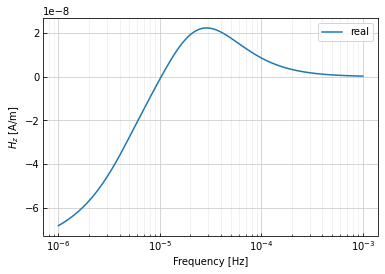

TypeError: __init__() missing 1 required positional argument: 'time'

In [7]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from emulatte.forward import model, transceiver, w1dem
thicks = np.array([20, 5, 2, 5])
res = np.array([100, 80, 10, 80, 100])
sc = np.array([0, 0, 0])
rc = np.array([100, 0, 0])
freqtime = np.logspace(-6, -3, 301)

mdl = model.Subsurface1D(thicks)
mdl.add_resistivity(res)
vmd = transceiver.VMD(freqtime)
mdl.locate(vmd, sc, rc)
ans = mdl.run(hankel_filter='anderson801', time_diff=False, td_transform='FFT')
resp = ans['h_z'].real
imsp = ans['h_z'].imag
freqtime = np.logspace(-6, -3, 301)
#freqtime = freqtime[1:]
plt.plot(freqtime, resp, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()


#w1dem
fdtd = 3
tx = [0]
ty = [0]
tz = [0]
rx = [100]
ry = [0]
rz = [0]

dipole_mom = 1
thickness = [20, 5, 2, 5]
res = np.array([100, 80, 10, 80, 100])
freqtime = np.logspace(-6, -3, 301)
plot_number = len(freqtime)
hankel_filter = "anderson801"
dbdt = 1

w1dem_tdem = w1dem.Tdem(rx, ry, rz, tx, ty, tz, res, thickness, hankel_filter, fdtd, dbdt, plot_number, freqtime)
freqtime = freqtime[1:]
bns, _ = w1dem_tdem.vmd(dipole_mom)
respb = bns['h_z'].real
plt.plot(freqtime, respb, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

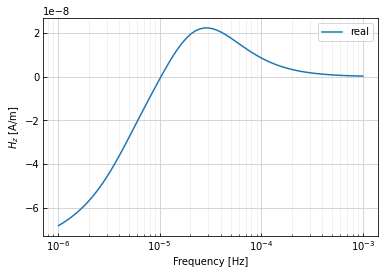

In [1]:
# FFHT DLAG
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../')
from emulatte.forward import model, transceiver, w1dem
thicks = np.array([20, 5, 2, 5])
res = np.array([100, 80, 10, 80, 100])
sc = np.array([0, 0, 0])
rc = np.array([100, 0, 0])
freqtime = np.logspace(-6, -3, 301)

mdl = model.Subsurface1D(thicks)
mdl.add_resistivity(res)
vmd = transceiver.VMD(freqtime)
mdl.locate(vmd, sc, rc)
ans, arg= mdl.run(hankel_filter='anderson801', time_diff=False, td_transform='DLAG')
resp = ans['h_z'].real
imsp = ans['h_z'].imag
freqtime = np.logspace(-6, -3, 301)
#freqtime = freqtime[1:]
plt.plot(arg, resp, "C0-", label='real')
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
#plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

In [25]:
type((1, 2))

tuple

6 1 2


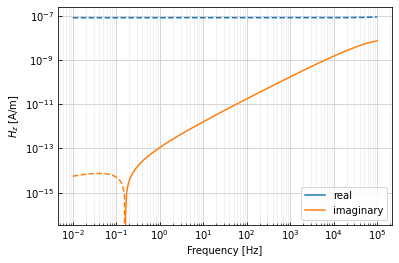

6 1 2


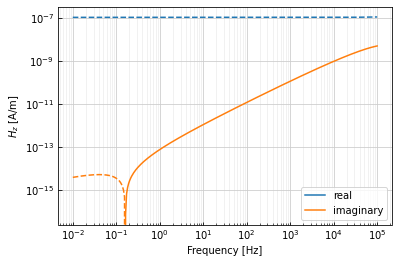

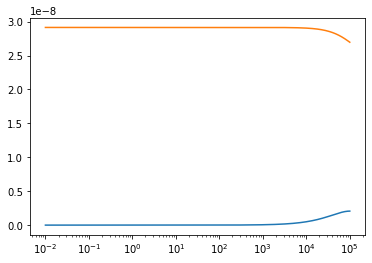

CPU times: user 1.63 s, sys: 130 ms, total: 1.75 s
Wall time: 1.75 s


In [19]:
%%time
#emulatte
thicks = np.array([20, 5, 2, 5])
dres = np.array([100, 80, 10, 80, 100])
charg = np.array([100, 100, 100, 100, 100])
tconst = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
fconst = np.array([0.5, 0.5, 0.5, 0.5, 0.5])
tc = np.array([0, 0, 0])
rc = np.array([100, 0, 0])
freqtime = np.logspace(-2, 5, 301)

model = fwd.model(thicks)
vmd = fwd.transceiver('VMD', freqtime, dipole_moment=1)
model.add_colecole_params(dres, charg, tconst, fconst)
#model.add_permeability([1, 1, 1, 100, 1, 1], relative=True)
#model.add_permittivity([1, 1, 2, 3, 2, 1], relative=True)

model.locate(vmd, tc, rc)
print(model.num_layer, model.tmt_layer, model.rcv_layer)
ans, _ = model.emulate(hankel_filter='key201')
resp = ans['h_z'].real
imsp = ans['h_z'].imag

plt.plot(freqtime, resp, "C0-", label='real')
plt.plot(freqtime, -resp, "C0--")
plt.plot(freqtime, imsp, "C1-", label='imaginary')
plt.plot(freqtime, -imsp, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

model = fwd.model(thicks)
vmd = fwd.transceiver('VMD', freqtime, dipole_moment=1)
model.add_colecole_params(dres, charg, tconst, fconst)
model.add_permeability([1, 1, 1, 100, 1, 1], relative=True)
model.add_permittivity([1, 1, 2, 3, 2, 1], relative=True)

model.locate(vmd, tc, rc)
print(model.num_layer, model.tmt_layer, model.rcv_layer)
ans, _ = model.emulate(hankel_filter='key201')
respb = ans['h_z'].real
imspb = ans['h_z'].imag

plt.plot(freqtime, respb, "C0-", label='real')
plt.plot(freqtime, -respb, "C0--")
plt.plot(freqtime, imspb, "C1-", label='imaginary')
plt.plot(freqtime, -imspb, "C1--")
plt.grid(which='major', c='#ccc')
plt.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency [Hz]')
plt.ylabel('$H_z$ [A/m]')
plt.legend()
plt.show()

respe = np.abs(resp-respb)
imspe = np.abs(imsp-imspb)
plt.plot(freqtime, imspe)
plt.plot(freqtime, respe)
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [15]:
imspe

array([100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.  